In [83]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# data

df = pd.read_csv('/Users/priyapatel/Downloads/AMZN.csv')


In [85]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6986 non-null   object 
 1   open       6986 non-null   float64
 2   high       6986 non-null   float64
 3   low        6986 non-null   float64
 4   close      6986 non-null   float64
 5   adj_close  6986 non-null   float64
 6   volume     6986 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 382.2+ KB


In [93]:
# missing values 
print(df.isnull().sum())


date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


In [123]:
# summary 
df.describe()=

,open,high,low,close,adj_close,volume
count,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6.986000e+03
mean,40.666560,41.139546,40.153303,40.659883,40.659883,1.360668e+08
std,58.107283,58.751435,57.401423,58.091213,58.091213,1.375800e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,2.100125,2.148125,2.064125,2.109750,2.109750,6.300350e+07
50%,9.033250,9.158500,8.921750,9.017000,9.017000,1.005360e+08
75%,72.673750,73.596622,71.368876,72.900251,72.900251,1.555295e+08
max,239.020004,242.520004,238.029999,242.059998,242.059998,2.086584e+09


In [143]:
df = pd.read_csv('/Users/priyapatel/Downloads/AMZN.csv')
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')


In [147]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df['date'] = pd.to_datetime(df['date'], utc=True)
df['date'] = df['date'].dt.tz_localize(None)
df.set_index('date', inplace=True)

In [151]:
print(df.head())

                         open      high       low     close  adj_close  \
date                                                                     
1997-05-15 04:00:00  0.121875  0.125000  0.096354  0.097917   0.097917   
1997-05-16 04:00:00  0.098438  0.098958  0.085417  0.086458   0.086458   
1997-05-19 04:00:00  0.088021  0.088542  0.081250  0.085417   0.085417   
1997-05-20 04:00:00  0.086458  0.087500  0.081771  0.081771   0.081771   
1997-05-21 04:00:00  0.081771  0.082292  0.068750  0.071354   0.071354   

                         volume  
date                             
1997-05-15 04:00:00  1443120000  
1997-05-16 04:00:00   294000000  
1997-05-19 04:00:00   122136000  
1997-05-20 04:00:00   109344000  
1997-05-21 04:00:00   377064000  


In [165]:
df['open_close_diff']=df['open'] - df['close']
df['open_close_diff'].describe()

count    6986.000000
mean        0.006677
std         1.122735
min       -11.520508
25%        -0.102500
50%        -0.000380
75%         0.093688
max        10.250000
Name: open_close_diff, dtype: float64

In [167]:
# focus on 2024 

df_2025 = df.loc["2024-01-01":"2024-12-31"]
print(df_2025.head())

                           open        high         low       close  \
date                                                                  
2024-01-02 05:00:00  151.539993  152.380005  148.389999  149.929993   
2024-01-03 05:00:00  149.199997  151.050003  148.330002  148.470001   
2024-01-04 05:00:00  145.589996  147.380005  144.050003  144.570007   
2024-01-05 05:00:00  144.690002  146.589996  144.529999  145.240005   
2024-01-08 05:00:00  146.740005  149.399994  146.149994  149.100006   

                      adj_close    volume  open_close_diff  
date                                                        
2024-01-02 05:00:00  149.929993  47339400         1.610001  
2024-01-03 05:00:00  148.470001  49425500         0.729996  
2024-01-04 05:00:00  144.570007  56039800         1.019989  
2024-01-05 05:00:00  145.240005  45124800        -0.550003  
2024-01-08 05:00:00  149.100006  46757100        -2.360001  


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

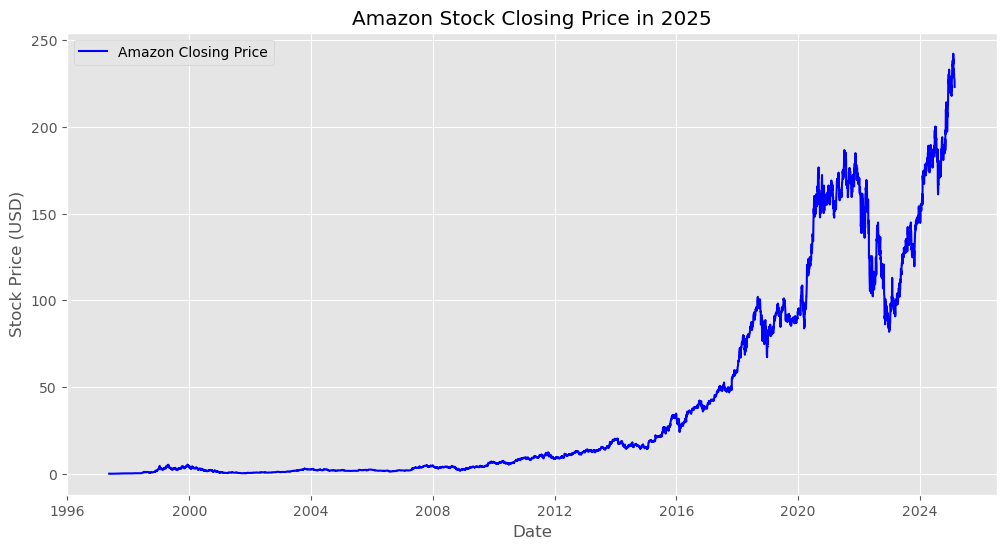

In [173]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Amazon Closing Price', color='blue')
plt.title('Amazon Stock Closing Price in 2025')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

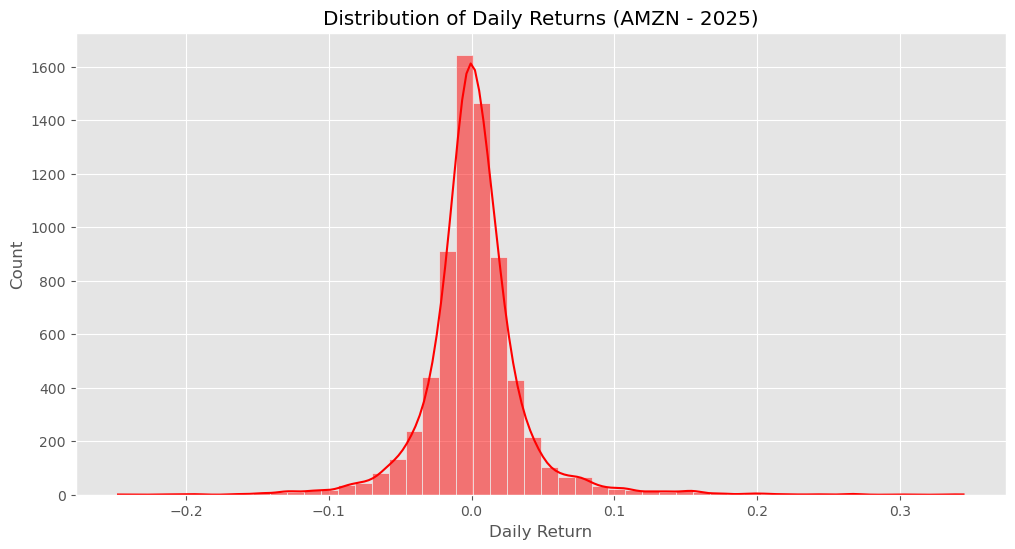

In [177]:
# looking closer at trends 
df['Daily Return'] = df['close'].pct_change()

plt.figure(figsize=(12, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='red')
plt.title('Distribution of Daily Returns (AMZN - 2025)')
plt.show()

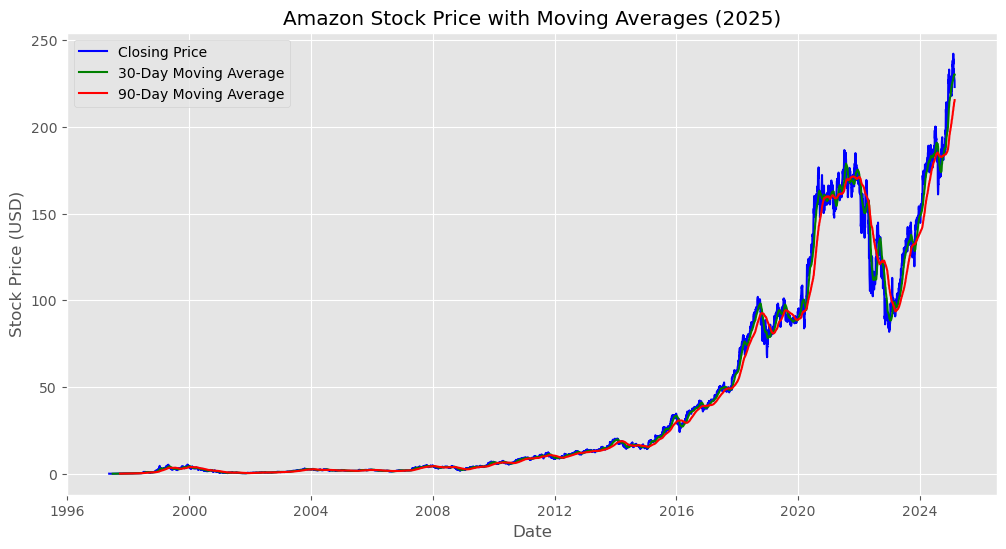

In [187]:
df['MA30'] = df['close'].rolling(window=30).mean()
df['MA90'] = df['close'].rolling(window=90).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Closing Price', color='blue')
plt.plot(df['MA30'], label='30-Day Moving Average', color='green')
plt.plot(df['MA90'], label='90-Day Moving Average', color='red')
plt.title('Amazon Stock Price with Moving Averages (2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

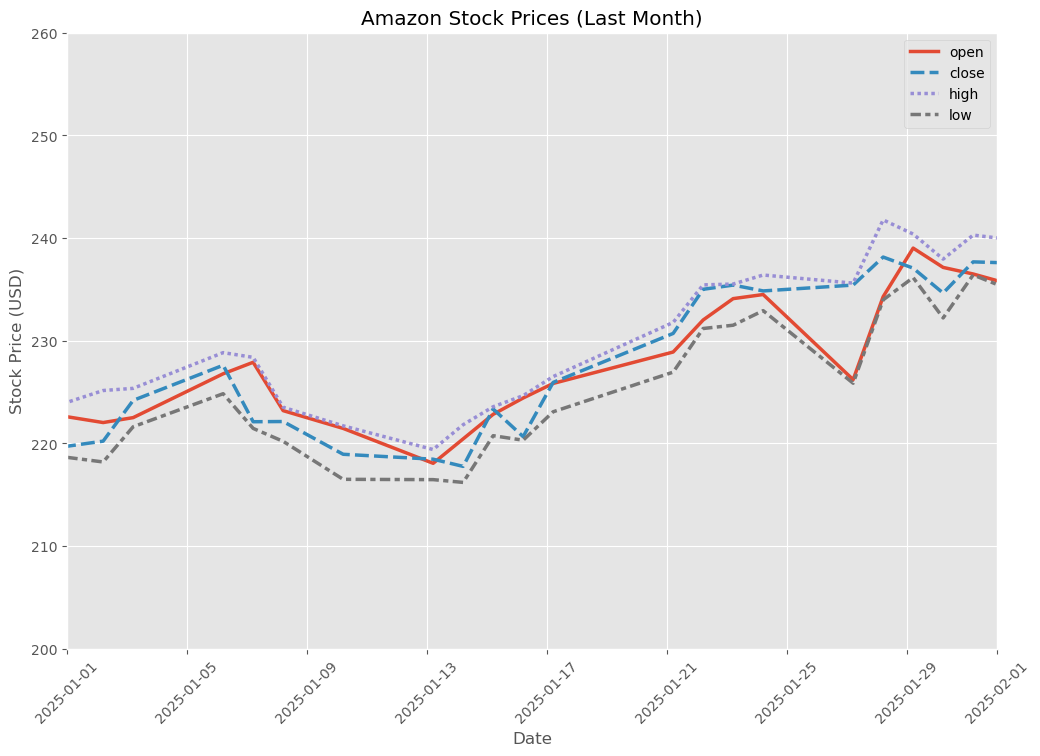

In [265]:
# stock prices in a last month
df = pd.read_csv('/Users/priyapatel/Downloads/AMZN.csv', parse_dates=['date'], index_col='date')

# Ensure Date Index is Properly Formatted
df.index = pd.to_datetime(df.index, utc=True)  
df.index = df.index.tz_localize(None)  

start_date = "2025-01-01"
end_date = "2025-02-01"
df_last_month = df.loc[start_date:end_date, ['open', 'close', 'high', 'low']]

df = df[['open','close','high', 'low']]
sns.lineplot(data=df, linewidth=2.5)
plt.ylim(200,260)
plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

plt.title('Amazon Stock Prices (Last Month)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.show()


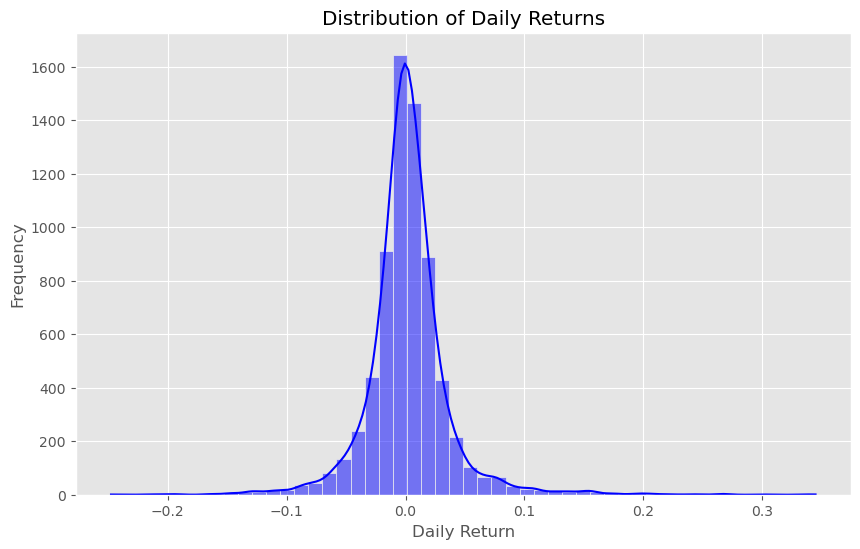

In [281]:
# Volatility analysis - calculate daily returns

df['daily_return'] = df['close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df['daily_return'].dropna(), bins=50, kde=True, color='blue')

plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')

plt.show()

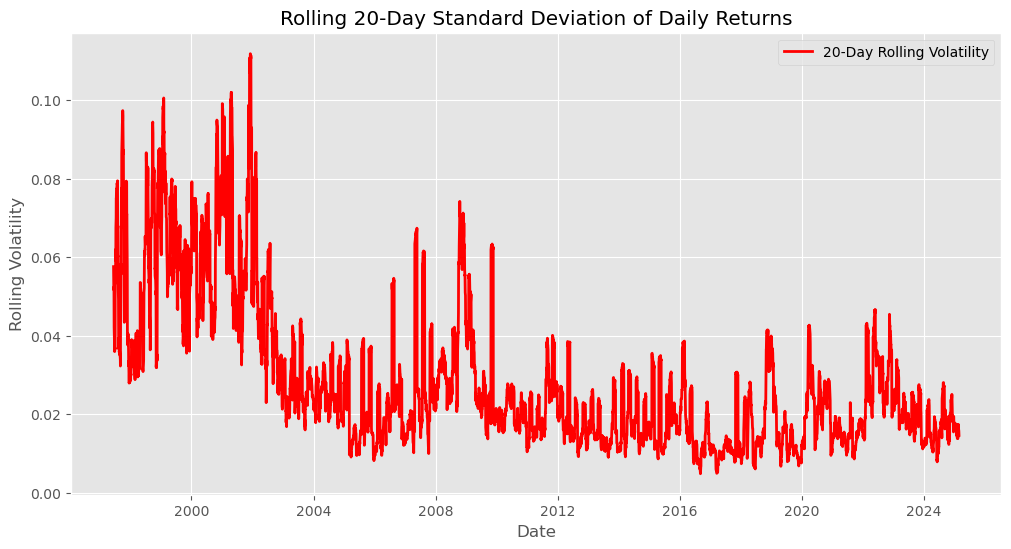

In [285]:
# rolling standard deviation to see volatility trends

df['rolling_volatility'] = df['daily_return'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_volatility'], color='red', linewidth=2, label='20-Day Rolling Volatility')

plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.title('Rolling 20-Day Standard Deviation of Daily Returns')
plt.legend()

plt.show()